# Battle of Two Cities: Sydney vs Melbourne

When it comes to the two most popular cities in Australia, choosing just one is a challenge.
From its vibrant street art to the world-famous Federation Square, Melbourne is rich in culture meant for lovers of art and history while Sydney’s pleasant weather pairs well with its beautiful beaches, attracting avid beachgoers, both locals and travellers alike.

*Note that for the sake of this project we are specifically considering City of Sydney and City of Melbourne and not the Greater region.*
 

## Aim:
Our goal is to perform a comparision of the two cities to see how similar or dissimilar they are, based on the popular venues across their suburbs. Such techniques allow users to identify similar neighbourhoods among cities based on amenities or services being offered locally, and thus can help in understanding the local area activities, what are the hubs of different activities, how citizens are experiencing the city, and how they are utilising its resources.


## Dataset:
To use place APIs in order to explore the suburbs in two cities we need to get their list of suburbs along with the geographical coordiantes.
Since we don't have the suburbs lists available, we will be doing some web scraping to pull out this information from wikipedia pages. For this we will be using BeautifulSoup library as it makes the web scraping part easier.

In [1]:
import requests
from bs4 import BeautifulSoup 

#Using wikipedia page of City of Sydney to pull Sydney suburbs list
data = requests.get("https://en.wikipedia.org/wiki/City_of_Sydney")
soup = BeautifulSoup(data.content, 'html.parser')

Now that we have the wikipedia page content loaded, we will now parse though the page to extract required information.

In [2]:
suburb_name_list = soup.find_all('ul')[31]
suburb_name_list_items = suburb_name_list.find_all('li')

#Creating empty list for Sydney Suburbs
Syd_Suburbs = []

for suburb in suburb_name_list_items:
    Syd_Suburbs.append(suburb.find('a').contents[0])
    
print(Syd_Suburbs)


['Alexandria', 'Annandale', 'Barangaroo', 'Beaconsfield', 'Camperdown', 'Centennial Park', 'Chippendale', 'Darlinghurst', 'Darlington', 'Dawes Point', 'Elizabeth Bay', 'Erskineville', 'Eveleigh', 'Forest Lodge', 'Glebe', 'Haymarket', 'Millers Point', 'Moore Park', 'Newtown', 'Paddington', 'Potts Point', 'Pyrmont', 'Redfern', 'Rosebery', 'Rushcutters Bay', 'St Peters', 'Surry Hills', 'Sydney CBD', 'The Rocks', 'Ultimo', 'Waterloo', 'Woolloomooloo', 'Zetland']


Now to get the geo-coordinates, we will use geopy library. Using ArcGIS module from this library we can fetch geo-coordiantes of any address.

In [3]:
from geopy.geocoders import ArcGIS
nom=ArcGIS()

In [4]:
Syd_Suburbs_Lat = [] #Latitude list for Sydney Suburbs
Syd_Suburbs_Long = [] #Longitude list for Sydney Suburbs
for item in Syd_Suburbs:
    temp_Coords = nom.geocode(item+", Sydney, New South Wales")
    Syd_Suburbs_Lat.append(temp_Coords.latitude)
    Syd_Suburbs_Long.append(temp_Coords.longitude)
        
print(Syd_Suburbs_Lat)

[-33.91236999999995, -33.88006999999993, -33.85825999999997, -33.912499999999966, -33.88805999999994, -33.89818999999994, -33.88845999999995, -33.87914999999998, -33.89184999999998, -33.85549999999995, -33.871459999999956, -33.89963999999998, -33.89757999999995, -33.88230999999996, -33.87713999999994, -33.87964999999997, -33.85832999999997, -33.89621999999997, -33.89857999999998, -33.88202999999993, -33.87156999999996, -33.87075999999996, -33.893149999999935, -33.91227999999995, -33.87534999999997, -33.91391999999996, -33.87896999999998, -33.86899999999997, -33.858499999999935, -33.880079999999964, -33.90029999999996, -33.86887999999993, -33.90753999999998]


In [5]:
print(Syd_Suburbs_Long)

[151.19703000000004, 151.1712900000001, 151.2024600000001, 151.20058000000006, 151.18321000000003, 151.23300000000006, 151.19811000000004, 151.22021000000007, 151.19356000000005, 151.20824000000005, 151.22540000000004, 151.18401000000006, 151.19436000000007, 151.18225000000007, 151.18491000000006, 151.20526000000007, 151.2033600000001, 151.2252800000001, 151.17613000000006, 151.22890000000007, 151.22288000000003, 151.1956100000001, 151.20670000000007, 151.2016500000001, 151.22588000000007, 151.1779100000001, 151.21303000000012, 151.2092, 151.2090700000001, 151.19878000000006, 151.20598000000007, 151.21951, 151.20752000000005]


Let's convert the three lists to Pandas Dataframes

In [6]:
import pandas as pd
df_Syd = pd.DataFrame(list(zip(Syd_Suburbs, Syd_Suburbs_Lat, Syd_Suburbs_Long)), columns = ['Suburbs', 'Latitude', 'Longitude'])
df_Syd.head()

,Suburbs,Latitude,Longitude
0,Alexandria,-33.91237,151.19703
1,Annandale,-33.88007,151.17129
2,Barangaroo,-33.85826,151.20246
3,Beaconsfield,-33.91250,151.20058
4,Camperdown,-33.88806,151.18321


Our Sydney suburbs dataframe with geo-location is now ready. Let's now repeat the same steps to fetch Melbourne Suburb information

In [7]:
data = requests.get("https://en.wikipedia.org/wiki/List_of_Melbourne_suburbs")
soup = BeautifulSoup(data.content,'html.parser')

In [8]:
suburb_name_list = soup.find_all('ul')[76]
suburb_name_list_items = suburb_name_list.find('li')
Melb_Suburbs = []
Melb_Suburbs.append(suburb_name_list_items.find('a').contents[0])

for nextSibling in suburb_name_list_items.findNextSiblings():
    Melb_Suburbs.append(nextSibling.find('a').contents[0])

print(Melb_Suburbs)

['Carlton', 'Carlton North', 'Docklands', 'East Melbourne', 'Flemington', 'Kensington', 'Melbourne', 'Melbourne', 'North Melbourne', 'Parkville', 'Port Melbourne', 'Southbank', 'South Wharf', 'South Yarra', 'West Melbourne']


In [9]:
Melb_Suburbs_Lat = [] #Latitude list for Melbourne Suburbs
Melb_Suburbs_Long = [] #Latitude list for Melbourne Suburbs
for item in Melb_Suburbs:
    temp_Coords = nom.geocode(item+", Melbourne, Victoria")
    Melb_Suburbs_Lat.append(temp_Coords.latitude)
    Melb_Suburbs_Long.append(temp_Coords.longitude)
    #Syd_Suburbs_Coords.append(str(nom.geocode(item+", Sydney, New South Wales")))
    
print(Melb_Suburbs_Long)

[144.96951, 144.97188000000006, 144.94555000000003, 144.9779900000001, 144.92965000000004, 144.92754000000002, 144.96751000000006, 144.96751000000006, 144.94609000000003, 144.95825000000002, 144.92434000000003, 144.96093000000008, 144.9515100000001, 144.9927100000001, 144.9503800000001]


In [10]:
print(Melb_Suburbs_Lat)

[-37.80100999999996, -37.78917999999993, -37.81925999999993, -37.81131999999997, -37.78813999999994, -37.794209999999964, -37.81738999999993, -37.81738999999993, -37.800539999999955, -37.79276999999996, -37.833009999999945, -37.82523999999995, -37.825909999999965, -37.83911999999998, -37.80670999999995]


In [11]:
df_Melb = pd.DataFrame(list(zip(Melb_Suburbs, Melb_Suburbs_Lat, Melb_Suburbs_Long)), columns = ['Suburbs', 'Latitude', 'Longitude'])
df_Melb.head()

,Suburbs,Latitude,Longitude
0,Carlton,-37.80101,144.96951
1,Carlton North,-37.78918,144.97188
2,Docklands,-37.81926,144.94555
3,East Melbourne,-37.81132,144.97799
4,Flemington,-37.78814,144.92965


In [12]:
df_Melb

,Suburbs,Latitude,Longitude
0,Carlton,-37.80101,144.96951
1,Carlton North,-37.78918,144.97188
2,Docklands,-37.81926,144.94555
3,East Melbourne,-37.81132,144.97799
4,Flemington,-37.78814,144.92965
5,Kensington,-37.79421,144.92754
6,Melbourne,-37.81739,144.96751
7,Melbourne,-37.81739,144.96751
8,North Melbourne,-37.80054,144.94609
9,Parkville,-37.79277,144.95825


The dataframe for Melbourne Suburbs  list with geo-cooridnates ais now reasy. We however see a duplicate entry on row 6 and 7. Let's get rid of those duplicates

In [13]:
df_Melb = df_Melb.drop_duplicates()

In [14]:
df_Melb.reset_index(drop=True)

,Suburbs,Latitude,Longitude
0,Carlton,-37.80101,144.96951
1,Carlton North,-37.78918,144.97188
2,Docklands,-37.81926,144.94555
3,East Melbourne,-37.81132,144.97799
4,Flemington,-37.78814,144.92965
5,Kensington,-37.79421,144.92754
6,Melbourne,-37.81739,144.96751
7,North Melbourne,-37.80054,144.94609
8,Parkville,-37.79277,144.95825
9,Port Melbourne,-37.83301,144.92434


The dataframe data looks perfect now as this marks our data gathering, exploration and cleanup as completed. Let's now visualize these suburbs on the maps of two cities.

Let's import the necessary library to plot the map.

In [15]:
import folium # map rendering library

Here we are now plotting all the Sydney suburbs on Sydney's map.

In [16]:
# create map of Sydney using latitude and longitude values
map_syd = folium.Map(location=[temp_Coords.latitude, temp_Coords.latitude], zoom_start=5)

# add markers to map
for lat, lng, label in zip(df_Syd['Latitude'], df_Syd['Longitude'], df_Syd['Suburbs']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_syd)  
    
map_syd

Looks good. Let's do the same with Melbourne map as well.

In [17]:
# create map of Melbourne using latitude and longitude values
map_melb = folium.Map(location=[temp_Coords.latitude, temp_Coords.latitude], zoom_start=5)

# add markers to map
for lat, lng, label in zip(df_Melb['Latitude'], df_Melb['Longitude'], df_Melb['Suburbs']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_melb)  
    
map_melb

Now moving to the next part where we want to explore the popular venues in these suburbs we will need a Places API. For this project we will use FourSquare API as it provides enough free requests. 

We had to register to Foursquare API to create our connection credentials.

In [83]:
# removing credentials before exporting the file to be shared with others
CLIENT_ID = 'XXXXXXXXXXXXXXXXXX' # your Foursquare ID
CLIENT_SECRET = 'XXXXXXXXXXX'
#ACCESS_TOKEN = 
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

The Foursquare API returns the response in JSON format hence let's write a function to gather near by venue details and saving that information in a dataframe 

In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Suburb', 
                  'Suburb Latitude', 
                  'Suburb Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Using the above function we will now fetch all the venues for Sydney suburbs

In [20]:
sydney_venues = getNearbyVenues(names=df_Syd['Suburbs'],
                                   latitudes=df_Syd['Latitude'],
                                   longitudes=df_Syd['Longitude']
                                  )

Alexandria
Annandale
Barangaroo
Beaconsfield
Camperdown
Centennial Park
Chippendale
Darlinghurst
Darlington
Dawes Point
Elizabeth Bay
Erskineville
Eveleigh
Forest Lodge
Glebe
Haymarket
Millers Point
Moore Park
Newtown
Paddington
Potts Point
Pyrmont
Redfern
Rosebery
Rushcutters Bay
St Peters
Surry Hills
Sydney CBD
The Rocks
Ultimo
Waterloo
Woolloomooloo
Zetland


In [21]:
print(sydney_venues.shape)
sydney_venues.head()

(1557, 7)


,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alexandria,-33.91237,151.19703,The Grounds Markets,-33.911844,151.194729,Flea Market
1,Alexandria,-33.91237,151.19703,The Potting Shed at The Grounds,-33.911094,151.194306,Restaurant
2,Alexandria,-33.91237,151.19703,The Grounds of Alexandria,-33.910774,151.194406,Café
3,Alexandria,-33.91237,151.19703,COOH Cafe & Roaster,-33.910476,151.195660,Café
4,Alexandria,-33.91237,151.19703,L'Americano,-33.910241,151.198653,Café


This dataframe contains various venues within the radius of 500m for each suburb in Sydney along with their category and geo coordinates.

In [22]:
sydney_venues.groupby('Suburb').count()

,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Suburb,,,,,,
Alexandria,24,24,24,24,24,24
Annandale,23,23,23,23,23,23
Barangaroo,29,29,29,29,29,29
Beaconsfield,21,21,21,21,21,21
Camperdown,17,17,17,17,17,17
Centennial Park,11,11,11,11,11,11
Chippendale,76,76,76,76,76,76
Darlinghurst,100,100,100,100,100,100
Darlington,28,28,28,28,28,28


Let's fetch the same information for Melbourne suburbs using the same function that we wrote earlier.

In [23]:
melbourne_venues = getNearbyVenues(names=df_Melb['Suburbs'],
                                   latitudes=df_Melb['Latitude'],
                                   longitudes=df_Melb['Longitude']
                                  )

Carlton
Carlton North
Docklands
East Melbourne
Flemington
Kensington
Melbourne
North Melbourne
Parkville
Port Melbourne
Southbank
South Wharf
South Yarra
West Melbourne


In [24]:
print(melbourne_venues.shape)
melbourne_venues.head()

(528, 7)


,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Carlton,-37.80101,144.96951,D.O.C. Pizza & Mozzarella Bar,-37.798954,144.968490,Pizza Place
1,Carlton,-37.80101,144.96951,Carlton Wine Room,-37.798584,144.968610,Wine Bar
2,Carlton,-37.80101,144.96951,Gewürzhaus,-37.799050,144.967480,Herbs & Spices Store
3,Carlton,-37.80101,144.96951,Yo-Chi,-37.798659,144.967849,Frozen Yogurt Shop
4,Carlton,-37.80101,144.96951,Assembly Coffee & Tea,-37.802750,144.967290,Coffee Shop


In [25]:
melbourne_venues.groupby('Suburb').count()

,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Suburb,,,,,,
Carlton,49,49,49,49,49,49
Carlton North,25,25,25,25,25,25
Docklands,39,39,39,39,39,39
East Melbourne,27,27,27,27,27,27
Flemington,26,26,26,26,26,26
Kensington,16,16,16,16,16,16
Melbourne,83,83,83,83,83,83
North Melbourne,17,17,17,17,17,17
Parkville,9,9,9,9,9,9


We now have Venue details for all the suburbs but in order to perform the categorical evaluation using the ML model we first need to transform this data.
This is why we use one hot encoder to perform “binarization” of the category.

In [26]:
# one hot encoding
sydney_onehot = pd.get_dummies(sydney_venues[['Venue Category']], prefix="", prefix_sep="")

# add suburb column back to dataframe
sydney_onehot['Suburb'] = sydney_venues['Suburb'] 

# move suburb column to the first column
fixed_columns = [sydney_onehot.columns[-1]] + list(sydney_onehot.columns[:-1])
sydney_onehot = sydney_onehot[fixed_columns]

sydney_onehot.head()

,Suburb,Adult Boutique,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Workshop,...,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Volleyball Court,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio
0,Alexandria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alexandria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Alexandria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Alexandria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Alexandria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
sydney_onehot.shape

(1557, 222)

Now we will group the dataset suburb-wise.

In [28]:
sydney_grouped = sydney_onehot.groupby('Suburb').mean().reset_index()
sydney_grouped

,Suburb,Adult Boutique,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Workshop,...,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Volleyball Court,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio
0,Alexandria,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Annandale,0.00,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Barangaroo,0.00,0.000000,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Beaconsfield,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Camperdown,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Centennial Park,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Chippendale,0.00,0.000000,0.026316,0.000000,0.000000,0.000000,0.013158,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.026316,0.000000,0.000000,0.000000,0.000000,0.013158
7,Darlinghurst,0.01,0.010000,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.000000,...,0.010000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
8,Darlington,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Dawes Point,0.00,0.000000,0.015625,0.015625,0.015625,0.015625,0.093750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [29]:
sydney_grouped.shape

(33, 222)

So now we have 33 Sydney Suburbs with 222 Venue categories all grouped on Mean values.
Now let's create the new dataframe and display the top 10 venues for each Sydney Suburb and for that let's write a short function to sort the venues for each row.

In [30]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

We will now use above function to fetch the top 10 most common venues for each suburb and append these to a new dataframe 'sydney_venues_sorted'

In [31]:
import numpy as np # importing numpy libraries since we need to use arange function to get equal intervals in our loop
num_top_venues = 10

indicators = ['st', 'nd', 'rd'] #to use as ordinals in the column names
columns = ['Suburb']

for ind in np.arange(num_top_venues): #Creating Column names
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
sydney_venues_sorted = pd.DataFrame(columns=columns) #Initiating the new dataframe
sydney_venues_sorted['Suburb'] = sydney_grouped['Suburb'] #getting the suburb names from our original dataset

for ind in np.arange(sydney_grouped.shape[0]):#looping against each row to get the sorted values for each suburb
    sydney_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sydney_grouped.iloc[ind, :], num_top_venues)

    
sydney_venues_sorted.head()    


,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alexandria,Café,Restaurant,Baby Store,Thai Restaurant,Grocery Store,Flea Market,Basketball Stadium,Coffee Shop,Sandwich Place,Liquor Store
1,Annandale,Café,Park,Grocery Store,Liquor Store,Garden Center,Fried Chicken Joint,Snack Place,Pizza Place,Bar,Bakery
2,Barangaroo,Café,Pub,Harbor / Marina,Hotel,Park,Hostel,Performing Arts Venue,Brewery,Grocery Store,Hotel Bar
3,Beaconsfield,Café,Coffee Shop,Liquor Store,Italian Restaurant,Pet Store,Grocery Store,Thai Restaurant,Greek Restaurant,Pizza Place,Sandwich Place
4,Camperdown,Café,Pub,Sports Bar,Convenience Store,Paper / Office Supplies Store,Thai Restaurant,Motorcycle Shop,Music Venue,Public Art,Portuguese Restaurant


And here is our Top 10 popular venues for each suburb in Sydney. Let's now do the similar data preparation for Melbourne Suburb.

In [32]:
# one hot encoding
melbourne_onehot = pd.get_dummies(melbourne_venues[['Venue Category']], prefix="", prefix_sep="")

# add suburb column back to dataframe
melbourne_onehot['Suburb'] = melbourne_venues['Suburb'] 

# move suburb column to the first column
fixed_columns = [melbourne_onehot.columns[-1]] + list(melbourne_onehot.columns[:-1])
melbourne_onehot = melbourne_onehot[fixed_columns]

melbourne_onehot.head()

,Suburb,African Restaurant,American Restaurant,Armenian Restaurant,Art Gallery,Art Museum,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,...,Tram Station,Tunnel,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio,Yunnan Restaurant
0,Carlton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Carlton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Carlton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Carlton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Carlton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
melbourne_onehot.shape

(528, 145)

In [34]:
melbourne_grouped = melbourne_onehot.groupby('Suburb').mean().reset_index()

melbourne_grouped.head()

,Suburb,African Restaurant,American Restaurant,Armenian Restaurant,Art Gallery,Art Museum,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,...,Tram Station,Tunnel,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio,Yunnan Restaurant
0,Carlton,0.0,0.0,0.0,0.0,0.0,0.0,0.020408,0.0,0.000000,...,0.000000,0.0,0.020408,0.020408,0.0,0.0,0.040816,0.0,0.0,0.020408
1,Carlton North,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.040000,...,0.040000,0.0,0.000000,0.000000,0.0,0.0,0.040000,0.0,0.0,0.000000
2,Docklands,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.025641,...,0.025641,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
3,East Melbourne,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.037037,0.0,0.000000,0.037037,0.0,0.0,0.074074,0.0,0.0,0.000000
4,Flemington,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.038462,0.0,0.000000,0.038462,0.0,0.0,0.000000,0.0,0.0,0.000000


In [35]:
melbourne_grouped.shape

(14, 145)

In [36]:
num_top_venues1 = 10

indicators = ['st', 'nd', 'rd'] #to use as ordinals in the column names
columns = ['Suburb']

for ind1 in np.arange(num_top_venues1): #Creating Column names
    try:
        columns.append('{}{} Most Common Venue'.format(ind1+1, indicators[ind1]))
    except:
        columns.append('{}th Most Common Venue'.format(ind1+1))
        
melbourne_venues_sorted = pd.DataFrame(columns=columns)
melbourne_venues_sorted['Suburb'] = melbourne_grouped['Suburb']

for ind1 in np.arange(melbourne_grouped.shape[0]):
    melbourne_venues_sorted.iloc[ind1, 1:] = return_most_common_venues(melbourne_grouped.iloc[ind1, :], num_top_venues1)

    
melbourne_venues_sorted.head() 

,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Carlton,Italian Restaurant,Café,Ice Cream Shop,Wine Bar,French Restaurant,Pizza Place,Coffee Shop,Yunnan Restaurant,Herbs & Spices Store,Dessert Shop
1,Carlton North,Pub,Café,Italian Restaurant,Grocery Store,Record Shop,Cocktail Bar,Chiropractor,Chinese Restaurant,Supermarket,Coffee Shop
2,Docklands,Café,Thai Restaurant,Salad Place,Italian Restaurant,Coffee Shop,Grocery Store,Bar,Gym / Fitness Center,Burger Joint,Pub
3,East Melbourne,Café,Park,Wine Bar,Garden,Hotel,Theater,Dessert Shop,Deli / Bodega,Rooftop Bar,Event Space
4,Flemington,Malay Restaurant,Café,Pizza Place,Tram Station,Gym,Chinese Restaurant,Coffee Shop,Supermarket,Dumpling Restaurant,Pharmacy


## Modelling: Clustering the Suburbs

Now in order to solve this classification problem we will use **K-Means method**. We will first cluster the venues for both places (Sydney and Melbourne) separately.



In [37]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 5

sydney_grouped_clustering = sydney_grouped.drop('Suburb', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sydney_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

C:\Users\alok\AppData\Local\Temp\ipykernel_31928\1242791444.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sydney_grouped_clustering = sydney_grouped.drop('Suburb', 1)
C:\Users\alok\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 1, 0, 3, 2, 1, 1, 0, 1])

In [38]:
# add clustering labels to the dataset
sydney_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


In [39]:
#Creating sydney_merged dataframe with all the suburb, geo-coordinates, Cluster Labels and Top 10 most popular venues
sydney_merged = df_Syd

# merge with teh previous dataframe to add latitude/longitude for each suburb
sydney_merged = sydney_merged.join(sydney_venues_sorted.set_index('Suburb'), on='Suburbs')

sydney_merged.head()

,Suburbs,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alexandria,-33.91237,151.19703,0,Café,Restaurant,Baby Store,Thai Restaurant,Grocery Store,Flea Market,Basketball Stadium,Coffee Shop,Sandwich Place,Liquor Store
1,Annandale,-33.88007,151.17129,0,Café,Park,Grocery Store,Liquor Store,Garden Center,Fried Chicken Joint,Snack Place,Pizza Place,Bar,Bakery
2,Barangaroo,-33.85826,151.20246,1,Café,Pub,Harbor / Marina,Hotel,Park,Hostel,Performing Arts Venue,Brewery,Grocery Store,Hotel Bar
3,Beaconsfield,-33.91250,151.20058,0,Café,Coffee Shop,Liquor Store,Italian Restaurant,Pet Store,Grocery Store,Thai Restaurant,Greek Restaurant,Pizza Place,Sandwich Place
4,Camperdown,-33.88806,151.18321,3,Café,Pub,Sports Bar,Convenience Store,Paper / Office Supplies Store,Thai Restaurant,Motorcycle Shop,Music Venue,Public Art,Portuguese Restaurant


Here we have all the Suburbs with their Top 10 most Common Venues Clustered together into 5 clusters using K-Means method.
We will now do the same data preparation for Melbourne Suburbs.

In [40]:
kclusters = 5

melbourne_grouped_clustering = melbourne_grouped.drop('Suburb', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(melbourne_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

C:\Users\alok\AppData\Local\Temp\ipykernel_31928\4272641912.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  melbourne_grouped_clustering = melbourne_grouped.drop('Suburb', 1)
C:\Users\alok\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 2, 2, 0, 0, 4, 0, 4, 3, 1])

In [41]:
# add clustering labels
melbourne_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [42]:
melbourne_merged = df_Melb

melbourne_merged = melbourne_merged.join(melbourne_venues_sorted.set_index('Suburb'), on='Suburbs')

melbourne_merged.head()

,Suburbs,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Carlton,-37.80101,144.96951,0,Italian Restaurant,Café,Ice Cream Shop,Wine Bar,French Restaurant,Pizza Place,Coffee Shop,Yunnan Restaurant,Herbs & Spices Store,Dessert Shop
1,Carlton North,-37.78918,144.97188,2,Pub,Café,Italian Restaurant,Grocery Store,Record Shop,Cocktail Bar,Chiropractor,Chinese Restaurant,Supermarket,Coffee Shop
2,Docklands,-37.81926,144.94555,2,Café,Thai Restaurant,Salad Place,Italian Restaurant,Coffee Shop,Grocery Store,Bar,Gym / Fitness Center,Burger Joint,Pub
3,East Melbourne,-37.81132,144.97799,0,Café,Park,Wine Bar,Garden,Hotel,Theater,Dessert Shop,Deli / Bodega,Rooftop Bar,Event Space
4,Flemington,-37.78814,144.92965,0,Malay Restaurant,Café,Pizza Place,Tram Station,Gym,Chinese Restaurant,Coffee Shop,Supermarket,Dumpling Restaurant,Pharmacy


Here is our Melbourne dataset with all the Suburbs with their top 10 most Common Venues clustered together into 5 Clusters.
Let's plot these five clusters with different colours on Sydney's and melbourne's maps.

In [43]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [44]:
# create Sydney map
address_syd = 'Sydney, New South Wales'

location_syd = nom.geocode(address_syd)
latitude_syd = location_syd.latitude
longtitude_syd = location_syd.longitude

print('The geograpical coordinate of Sydney are {}, {}.'.format(latitude_syd, longtitude_syd))

map_clusters = folium.Map(location=[latitude_syd, longtitude_syd], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sydney_merged['Latitude'], sydney_merged['Longitude'], sydney_merged['Suburbs'], sydney_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

The geograpical coordinate of Sydney are -33.869599999999934, 151.2069100000001.


The above map shows the venue dataset broadly clustered into 2 clusters, this denotes that we should find the value of K using elbow method, as it is evident that there was no need of 5 clusters for this dataset.

In [45]:
# create Melbourne map
address_mel = 'Melbourne, Victoria'

location_mel = nom.geocode(address_syd)
latitude_mel = location_mel.latitude
longtitude_mel = location_mel.longitude

print('The geograpical coordinate of Melbourne are {}, {}.'.format(latitude_mel, longtitude_mel))

map_clusters = folium.Map(location=[latitude_mel, longtitude_mel], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(melbourne_merged['Latitude'], melbourne_merged['Longitude'], melbourne_merged['Suburbs'], melbourne_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

The geograpical coordinate of Melbourne are -33.869599999999934, 151.2069100000001.


Let's analyze one of the five clusters for both Sydney and Melbourne

### Cluster 1 for Sydney

In [46]:
sydney_merged.loc[sydney_merged['Cluster Labels'] == 0, sydney_merged.columns[[0] + list(range(4, sydney_merged.shape[1]))]]


,Suburbs,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alexandria,Café,Restaurant,Baby Store,Thai Restaurant,Grocery Store,Flea Market,Basketball Stadium,Coffee Shop,Sandwich Place,Liquor Store
1,Annandale,Café,Park,Grocery Store,Liquor Store,Garden Center,Fried Chicken Joint,Snack Place,Pizza Place,Bar,Bakery
3,Beaconsfield,Café,Coffee Shop,Liquor Store,Italian Restaurant,Pet Store,Grocery Store,Thai Restaurant,Greek Restaurant,Pizza Place,Sandwich Place
8,Darlington,Café,Pub,Coffee Shop,Thai Restaurant,Beer Garden,Performing Arts Venue,Turkish Restaurant,College Rec Center,Office,Grocery Store
12,Eveleigh,Pub,Café,Bakery,Grocery Store,Music Venue,Thai Restaurant,Breakfast Spot,Coffee Shop,Park,Market
22,Redfern,Café,Bar,Theater,Gym / Fitness Center,Dance Studio,Pizza Place,Cocktail Bar,Pub,Indian Restaurant,Salon / Barbershop
23,Rosebery,Coffee Shop,Café,Liquor Store,Italian Restaurant,Sandwich Place,Thai Restaurant,Pet Store,Grocery Store,Greek Restaurant,Pizza Place
29,Ultimo,Café,Bar,Coffee Shop,Malay Restaurant,Chinese Restaurant,Taiwanese Restaurant,Korean BBQ Restaurant,Dumpling Restaurant,Japanese Restaurant,Vietnamese Restaurant
30,Waterloo,Café,Pub,Grocery Store,Pizza Place,Art Gallery,Japanese Restaurant,Korean Restaurant,Gym,Auto Workshop,Costume Shop
32,Zetland,Café,Coffee Shop,Japanese Restaurant,Park,Hotel,Bus Stop,Mobile Phone Shop,Train Station,Shoe Store,Clothing Store


### Cluster 1 for Melbourne    

In [47]:
melbourne_merged.loc[melbourne_merged['Cluster Labels'] == 0, melbourne_merged.columns[[0] + list(range(4, melbourne_merged.shape[1]))]]


,Suburbs,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Carlton,Italian Restaurant,Café,Ice Cream Shop,Wine Bar,French Restaurant,Pizza Place,Coffee Shop,Yunnan Restaurant,Herbs & Spices Store,Dessert Shop
3,East Melbourne,Café,Park,Wine Bar,Garden,Hotel,Theater,Dessert Shop,Deli / Bodega,Rooftop Bar,Event Space
4,Flemington,Malay Restaurant,Café,Pizza Place,Tram Station,Gym,Chinese Restaurant,Coffee Shop,Supermarket,Dumpling Restaurant,Pharmacy
6,Melbourne,Coffee Shop,Bar,Hotel,Italian Restaurant,Asian Restaurant,Cocktail Bar,French Restaurant,Waterfront,Burger Joint,Theater
11,Southbank,Hotel,Café,Bar,Italian Restaurant,Grocery Store,Coffee Shop,Supermarket,Japanese Restaurant,Casino,Plaza
12,South Wharf,Sporting Goods Shop,Bar,Hotel,Clothing Store,Italian Restaurant,Seafood Restaurant,Grocery Store,Steakhouse,Cooking School,Harbor / Marina


### Cluster 2 for Sydney

In [48]:
sydney_merged.loc[sydney_merged['Cluster Labels'] == 1, sydney_merged.columns[[0] + list(range(4, sydney_merged.shape[1]))]]


,Suburbs,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Barangaroo,Café,Pub,Harbor / Marina,Hotel,Park,Hostel,Performing Arts Venue,Brewery,Grocery Store,Hotel Bar
6,Chippendale,Café,Bar,Pub,Coffee Shop,Thai Restaurant,Burger Joint,Gelato Shop,Dessert Shop,Bakery,Supermarket
7,Darlinghurst,Café,Italian Restaurant,Pub,Japanese Restaurant,Hotel,Pizza Place,Bar,Thai Restaurant,Gay Bar,Bookstore
9,Dawes Point,Café,Australian Restaurant,Hotel,Harbor / Marina,Brewery,Japanese Restaurant,Scenic Lookout,Pub,Bar,Performing Arts Venue
10,Elizabeth Bay,Café,Hotel,Italian Restaurant,Pub,Park,Bar,Supermarket,Coffee Shop,Australian Restaurant,Japanese Restaurant
11,Erskineville,Pub,Café,Bar,Ice Cream Shop,Deli / Bodega,Playground,Park,Motorcycle Shop,Theater,Israeli Restaurant
14,Glebe,Café,Bar,Park,Thai Restaurant,Coffee Shop,Pub,Japanese Restaurant,Pizza Place,Sports Club,Sri Lankan Restaurant
15,Haymarket,Thai Restaurant,Café,Japanese Restaurant,Chinese Restaurant,Korean BBQ Restaurant,Hotel,Malay Restaurant,Shaanxi Restaurant,Sushi Restaurant,Hostel
16,Millers Point,Café,Pub,Hotel,Harbor / Marina,Brewery,Coffee Shop,Bar,Park,Hostel,Lebanese Restaurant
17,Moore Park,Cricket Ground,Event Space,Bus Stop,Park,Café,Pastry Shop,Stables,German Restaurant,Golf Course,Comedy Club


In [49]:
### Cluster 2 for Melbourne

In [50]:
melbourne_merged.loc[melbourne_merged['Cluster Labels'] == 1, melbourne_merged.columns[[0] + list(range(4, melbourne_merged.shape[1]))]]


,Suburbs,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Port Melbourne,Go Kart Track,Paintball Field,Boxing Gym,Beach,Baseball Field,Park,Pool,Plaza,Playground,Pizza Place


We can see that we have Suburbs with similar type of localities and experiences clubbed under different set of clusters but this still doesn't give us any insight on how we can corelate Sydney to Melbourne.

Let's try to look at the numbers from a different perspective like how common are these Venue categories across Sydney and Melbourne. 

In [51]:
sydney_venues_insight = sydney_venues.groupby('Venue Category').count()

In [52]:
sydney_venues_insight = sydney_venues_insight.sort_values(by='Venue', ascending=False).head(10)
sydney_venues_insight

,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Café,233,233,233,233,233,233
Pub,75,75,75,75,75,75
Hotel,70,70,70,70,70,70
Bar,58,58,58,58,58,58
Coffee Shop,53,53,53,53,53,53
Italian Restaurant,52,52,52,52,52,52
Thai Restaurant,46,46,46,46,46,46
Japanese Restaurant,37,37,37,37,37,37
Park,35,35,35,35,35,35


In [53]:
sydney_venues_insight = sydney_venues_insight.drop(['Suburb', 'Suburb Latitude', 'Suburb Longitude', 'Venue Latitude', 'Venue Longitude'], axis=1)
sydney_venues_insight = sydney_venues_insight.rename(columns={'Venue': 'Sydney_Venues_Count'})
sydney_venues_insight

,Sydney_Venues_Count
Venue Category,
Café,233
Pub,75
Hotel,70
Bar,58
Coffee Shop,53
Italian Restaurant,52
Thai Restaurant,46
Japanese Restaurant,37
Park,35


This gives us an insight of what are the top 10 most common venues across Sydney. This data can help us give a peek to the lifestyles of Sydney residents and what are the most common choices people make.

In [54]:
melbourne_venues_insight = melbourne_venues.groupby('Venue Category').count()
melbourne_venues_insight = melbourne_venues_insight.sort_values(by='Venue', ascending=False).head(10)
melbourne_venues_insight = melbourne_venues_insight.drop(['Suburb', 'Suburb Latitude', 'Suburb Longitude', 'Venue Latitude', 'Venue Longitude'], axis=1)
melbourne_venues_insight = melbourne_venues_insight.rename(columns={'Venue': 'Melbourne_Venues_Count'})
melbourne_venues_insight

,Melbourne_Venues_Count
Venue Category,
Café,68
Italian Restaurant,31
Hotel,29
Coffee Shop,20
Bar,20
Japanese Restaurant,13
Pub,13
Grocery Store,12
Pizza Place,11


Similar to Sydney we now have insight to Melbourne about the top 10 most common venues and lifestyles of Melbourne residents and what are the most common choices people make.
Let's compare the two side by side for a clear picture.

In [55]:
syd_melb_comp = pd.merge(sydney_venues_insight, melbourne_venues_insight, on='Venue Category', how = 'outer')
syd_melb_comp

,Sydney_Venues_Count,Melbourne_Venues_Count
Venue Category,,
Café,233.0,68.0
Pub,75.0,13.0
Hotel,70.0,29.0
Bar,58.0,20.0
Coffee Shop,53.0,20.0
Italian Restaurant,52.0,31.0
Thai Restaurant,46.0,NaN
Japanese Restaurant,37.0,13.0
Park,35.0,11.0


Few things that are evident from the above comparision:

    * Most of the venues from the Top 10 list of both cities are actually falling under same categories.
    * Although Cafe is the category that topped in both the list still the difference is significant high between the two. We thought it could be because of the area of the two cities however we found that The city of Sydney is actually smaller than the City of Melbourne. So this number is only justified owing to the high population density of Sydney.
    * Italian and Japanese seem to be the most popular cuisine in both cities, however there are opportunities for Thai and Australian restaurants in Melbourne as they are quite famous in Sydney.
    
Let's plot these numbers on few charts for visualization.

In [56]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

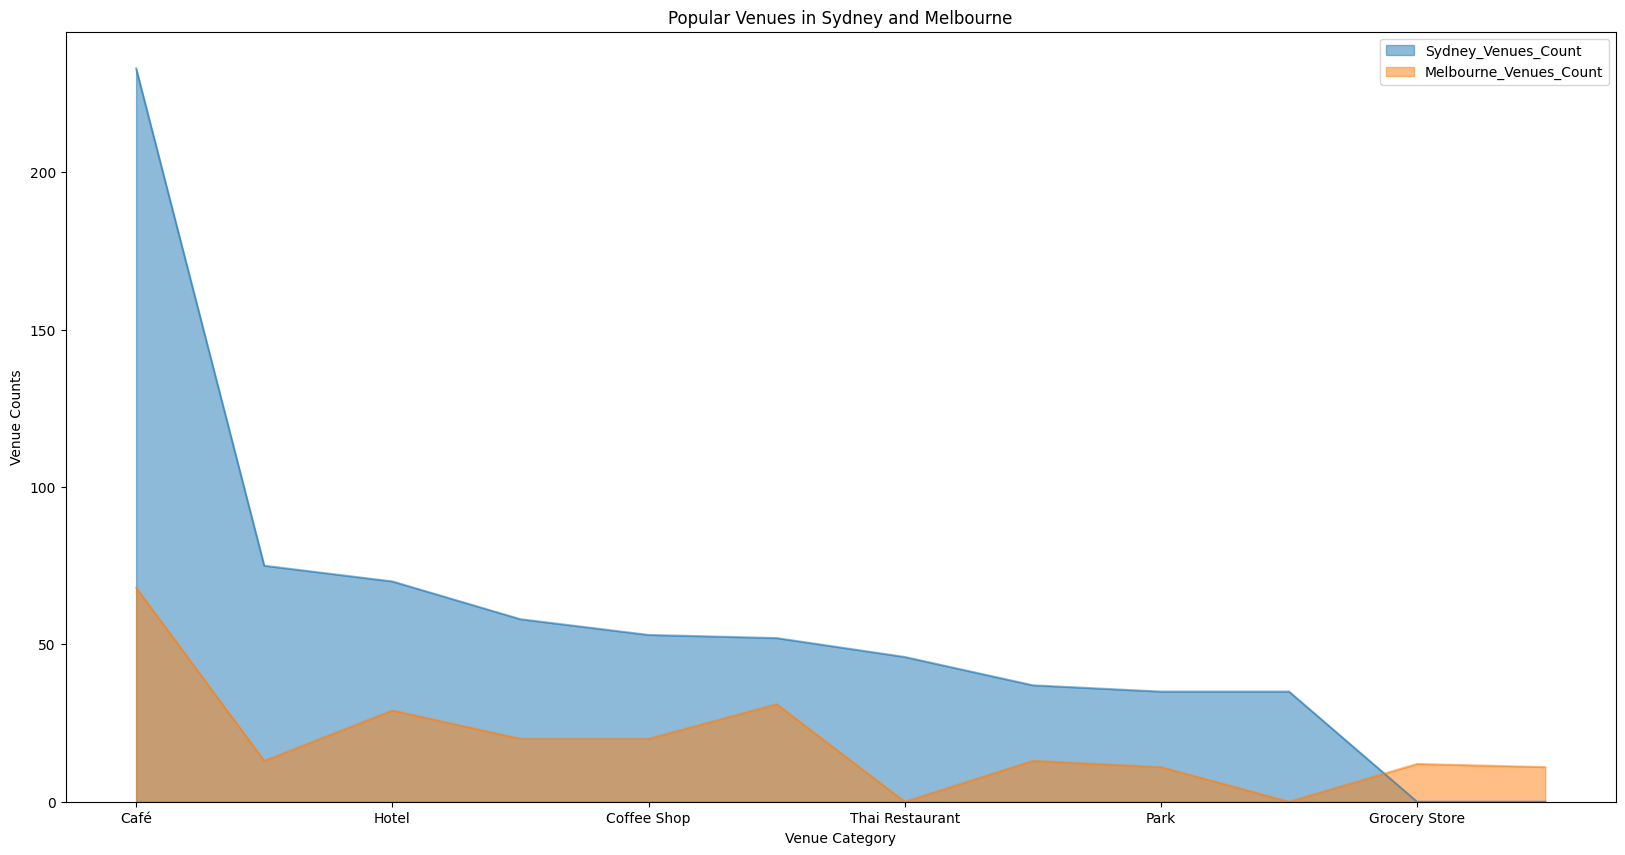

In [57]:
 
syd_melb_comp.plot(kind='area', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Popular Venues in Sydney and Melbourne')
plt.ylabel('Venue Counts')
plt.xlabel('Venue Category')

plt.show()

Text(0.5, 1.0, 'Popular Venues in Sydney and Melbourne')

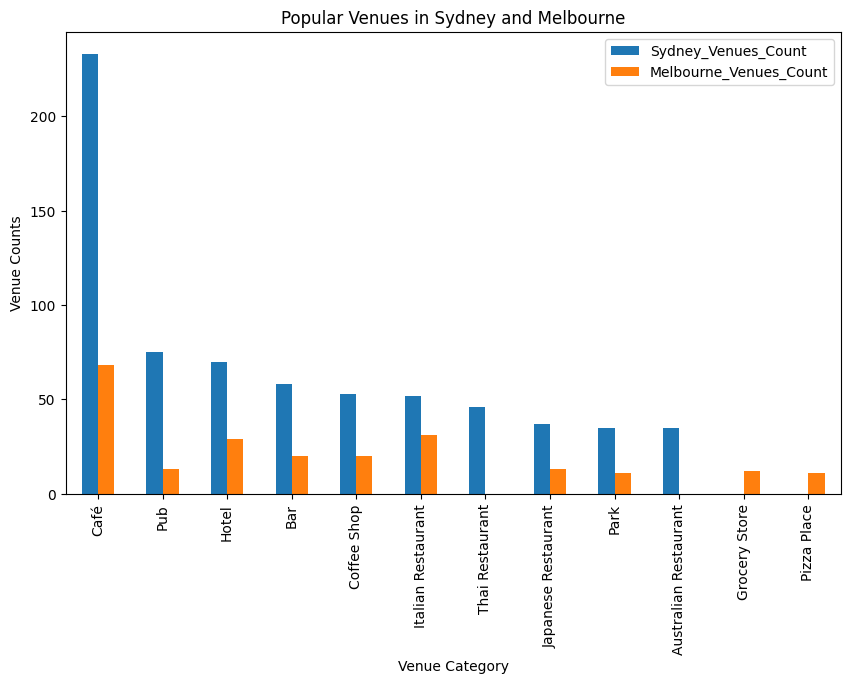

In [58]:
syd_melb_comp.plot(kind='bar', figsize=(10, 6), rot=90) 

plt.xlabel('Venue Category')
plt.ylabel('Venue Counts')
plt.title('Popular Venues in Sydney and Melbourne')

The above graph is full of insights: 
* It clearly shows that for almost all the venues, Sydney prevails which suggests that Sydney seems to be more populous than Melbourne. 
* It is also safe to imply that per capita income must be greater in Sydney than Melbourne. 
* However, apart from above mentioned dissimilarities, it is also evident that although less but Melbourne too has all the amenities readily available to people and can't be considered inferior.

Now let's try K-Mean clustering on the two datasets together to see what insights can be fetched

## K-Means Clustering on the two datasets together

We will now merge the two datasets from Sydney and Melbourne into one for K-means clustering

In [59]:
sydney_merged['City'] = 'Sydney'

In [60]:
#moving this new column to the first position
first_column = sydney_merged.pop('City')

sydney_merged.insert(0, 'City', first_column)
sydney_merged.head()

,City,Suburbs,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Sydney,Alexandria,-33.91237,151.19703,0,Café,Restaurant,Baby Store,Thai Restaurant,Grocery Store,Flea Market,Basketball Stadium,Coffee Shop,Sandwich Place,Liquor Store
1,Sydney,Annandale,-33.88007,151.17129,0,Café,Park,Grocery Store,Liquor Store,Garden Center,Fried Chicken Joint,Snack Place,Pizza Place,Bar,Bakery
2,Sydney,Barangaroo,-33.85826,151.20246,1,Café,Pub,Harbor / Marina,Hotel,Park,Hostel,Performing Arts Venue,Brewery,Grocery Store,Hotel Bar
3,Sydney,Beaconsfield,-33.91250,151.20058,0,Café,Coffee Shop,Liquor Store,Italian Restaurant,Pet Store,Grocery Store,Thai Restaurant,Greek Restaurant,Pizza Place,Sandwich Place
4,Sydney,Camperdown,-33.88806,151.18321,3,Café,Pub,Sports Bar,Convenience Store,Paper / Office Supplies Store,Thai Restaurant,Motorcycle Shop,Music Venue,Public Art,Portuguese Restaurant


In [61]:
melbourne_merged['City'] = 'Melbourne'
# let's bring the City column to the first place
first_column = melbourne_merged.pop('City')

melbourne_merged.insert(0, 'City', first_column)
melbourne_merged.head()

,City,Suburbs,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Melbourne,Carlton,-37.80101,144.96951,0,Italian Restaurant,Café,Ice Cream Shop,Wine Bar,French Restaurant,Pizza Place,Coffee Shop,Yunnan Restaurant,Herbs & Spices Store,Dessert Shop
1,Melbourne,Carlton North,-37.78918,144.97188,2,Pub,Café,Italian Restaurant,Grocery Store,Record Shop,Cocktail Bar,Chiropractor,Chinese Restaurant,Supermarket,Coffee Shop
2,Melbourne,Docklands,-37.81926,144.94555,2,Café,Thai Restaurant,Salad Place,Italian Restaurant,Coffee Shop,Grocery Store,Bar,Gym / Fitness Center,Burger Joint,Pub
3,Melbourne,East Melbourne,-37.81132,144.97799,0,Café,Park,Wine Bar,Garden,Hotel,Theater,Dessert Shop,Deli / Bodega,Rooftop Bar,Event Space
4,Melbourne,Flemington,-37.78814,144.92965,0,Malay Restaurant,Café,Pizza Place,Tram Station,Gym,Chinese Restaurant,Coffee Shop,Supermarket,Dumpling Restaurant,Pharmacy


In [62]:
print('Sydney Dataframe dimensions:'+ str(sydney_merged.shape))
print('Melbourne Dataframe dimensions:'+ str(melbourne_merged.shape))

# merging the two datasets now
syd_melb_merged = sydney_merged.append(melbourne_merged)

print('Merged Dataframe dimensions:'+ str(syd_melb_merged.shape))

Sydney Dataframe dimensions:(33, 15)
Melbourne Dataframe dimensions:(14, 15)
Merged Dataframe dimensions:(47, 15)


C:\Users\alok\AppData\Local\Temp\ipykernel_31928\2861038205.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  syd_melb_merged = sydney_merged.append(melbourne_merged)


In [63]:
syd_melb_merged.head()

,City,Suburbs,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Sydney,Alexandria,-33.91237,151.19703,0,Café,Restaurant,Baby Store,Thai Restaurant,Grocery Store,Flea Market,Basketball Stadium,Coffee Shop,Sandwich Place,Liquor Store
1,Sydney,Annandale,-33.88007,151.17129,0,Café,Park,Grocery Store,Liquor Store,Garden Center,Fried Chicken Joint,Snack Place,Pizza Place,Bar,Bakery
2,Sydney,Barangaroo,-33.85826,151.20246,1,Café,Pub,Harbor / Marina,Hotel,Park,Hostel,Performing Arts Venue,Brewery,Grocery Store,Hotel Bar
3,Sydney,Beaconsfield,-33.91250,151.20058,0,Café,Coffee Shop,Liquor Store,Italian Restaurant,Pet Store,Grocery Store,Thai Restaurant,Greek Restaurant,Pizza Place,Sandwich Place
4,Sydney,Camperdown,-33.88806,151.18321,3,Café,Pub,Sports Bar,Convenience Store,Paper / Office Supplies Store,Thai Restaurant,Motorcycle Shop,Music Venue,Public Art,Portuguese Restaurant


In [64]:
# Cluster Labels column has no significance in this new dataframe since these values were generated for individual datasets
syd_melb_merged = syd_melb_merged.drop(['Cluster Labels'], axis=1)
syd_melb_merged.head()

,City,Suburbs,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Sydney,Alexandria,-33.91237,151.19703,Café,Restaurant,Baby Store,Thai Restaurant,Grocery Store,Flea Market,Basketball Stadium,Coffee Shop,Sandwich Place,Liquor Store
1,Sydney,Annandale,-33.88007,151.17129,Café,Park,Grocery Store,Liquor Store,Garden Center,Fried Chicken Joint,Snack Place,Pizza Place,Bar,Bakery
2,Sydney,Barangaroo,-33.85826,151.20246,Café,Pub,Harbor / Marina,Hotel,Park,Hostel,Performing Arts Venue,Brewery,Grocery Store,Hotel Bar
3,Sydney,Beaconsfield,-33.91250,151.20058,Café,Coffee Shop,Liquor Store,Italian Restaurant,Pet Store,Grocery Store,Thai Restaurant,Greek Restaurant,Pizza Place,Sandwich Place
4,Sydney,Camperdown,-33.88806,151.18321,Café,Pub,Sports Bar,Convenience Store,Paper / Office Supplies Store,Thai Restaurant,Motorcycle Shop,Music Venue,Public Art,Portuguese Restaurant


Now that the top 10 venues data is merged, we will now merge all the venues one-hot encoded data for the clustering purpose

In [65]:
sydney_grouped_clustering.head()

,Adult Boutique,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,...,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Volleyball Court,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.041667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.043478,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.034483,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
melbourne_grouped_clustering.head()

,African Restaurant,American Restaurant,Armenian Restaurant,Art Gallery,Art Museum,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Bakery,...,Tram Station,Tunnel,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio,Yunnan Restaurant
0,0.0,0.0,0.0,0.0,0.0,0.0,0.020408,0.0,0.000000,0.020408,...,0.000000,0.0,0.020408,0.020408,0.0,0.0,0.040816,0.0,0.0,0.020408
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.040000,0.040000,...,0.040000,0.0,0.000000,0.000000,0.0,0.0,0.040000,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.025641,0.000000,...,0.025641,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.037037,0.0,0.000000,0.037037,0.0,0.0,0.074074,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.038462,...,0.038462,0.0,0.000000,0.038462,0.0,0.0,0.000000,0.0,0.0,0.000000


In [67]:
print('Sydney Cluster Dataframe dimensions:'+ str(sydney_grouped_clustering.shape))
print('Melbourne Cluster Dataframe dimensions:'+ str(melbourne_grouped_clustering.shape))

syd_melb_clustering = pd.concat([sydney_grouped_clustering, melbourne_grouped_clustering], sort=False)
print('Merged Cluster Dataframe dimensions:'+ str(syd_melb_clustering.shape))


Sydney Cluster Dataframe dimensions:(33, 221)
Melbourne Cluster Dataframe dimensions:(14, 144)
Merged Cluster Dataframe dimensions:(47, 257)


In [68]:
syd_melb_clustering.head()

,Adult Boutique,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,...,Stadium,Stationery Store,Street,Street Art,Taco Place,Theme Park,Track,Tram Station,Waterfront,Yunnan Restaurant
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.041667,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.043478,0.0,0.000000,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.034483,0.0,0.000000,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Removing all the NaN values and replacing those with numeric '0'.

In [69]:
syd_melb_clustering = syd_melb_clustering.fillna(0)
syd_melb_clustering.head()


,Adult Boutique,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,...,Stadium,Stationery Store,Street,Street Art,Taco Place,Theme Park,Track,Tram Station,Waterfront,Yunnan Restaurant
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.041667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.043478,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.034483,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
np.where(np.isnan(syd_melb_clustering))

(array([], dtype=int64), array([], dtype=int64))

In [71]:
syd_melb_clustering.head()

,Adult Boutique,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,...,Stadium,Stationery Store,Street,Street Art,Taco Place,Theme Park,Track,Tram Station,Waterfront,Yunnan Restaurant
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.041667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.043478,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.034483,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let's now perform the K-Means Clustering on this merged dataset.

In [72]:
kclusters = 5


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(syd_melb_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

C:\Users\alok\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 4, 1, 2, 2, 4, 4, 4, 4])

In [73]:
syd_melb_merged.insert(0, 'Cluster Labels', kmeans.labels_)
syd_melb_merged.shape

(47, 15)

In [74]:
syd_melb_merged.head()

,Cluster Labels,City,Suburbs,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2,Sydney,Alexandria,-33.91237,151.19703,Café,Restaurant,Baby Store,Thai Restaurant,Grocery Store,Flea Market,Basketball Stadium,Coffee Shop,Sandwich Place,Liquor Store
1,2,Sydney,Annandale,-33.88007,151.17129,Café,Park,Grocery Store,Liquor Store,Garden Center,Fried Chicken Joint,Snack Place,Pizza Place,Bar,Bakery
2,4,Sydney,Barangaroo,-33.85826,151.20246,Café,Pub,Harbor / Marina,Hotel,Park,Hostel,Performing Arts Venue,Brewery,Grocery Store,Hotel Bar
3,1,Sydney,Beaconsfield,-33.91250,151.20058,Café,Coffee Shop,Liquor Store,Italian Restaurant,Pet Store,Grocery Store,Thai Restaurant,Greek Restaurant,Pizza Place,Sandwich Place
4,2,Sydney,Camperdown,-33.88806,151.18321,Café,Pub,Sports Bar,Convenience Store,Paper / Office Supplies Store,Thai Restaurant,Motorcycle Shop,Music Venue,Public Art,Portuguese Restaurant


In [75]:
syd_melb_merged = syd_melb_merged.reset_index(drop=True)
syd_melb_merged

,Cluster Labels,City,Suburbs,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2,Sydney,Alexandria,-33.91237,151.19703,Café,Restaurant,Baby Store,Thai Restaurant,Grocery Store,Flea Market,Basketball Stadium,Coffee Shop,Sandwich Place,Liquor Store
1,2,Sydney,Annandale,-33.88007,151.17129,Café,Park,Grocery Store,Liquor Store,Garden Center,Fried Chicken Joint,Snack Place,Pizza Place,Bar,Bakery
2,4,Sydney,Barangaroo,-33.85826,151.20246,Café,Pub,Harbor / Marina,Hotel,Park,Hostel,Performing Arts Venue,Brewery,Grocery Store,Hotel Bar
3,1,Sydney,Beaconsfield,-33.91250,151.20058,Café,Coffee Shop,Liquor Store,Italian Restaurant,Pet Store,Grocery Store,Thai Restaurant,Greek Restaurant,Pizza Place,Sandwich Place
4,2,Sydney,Camperdown,-33.88806,151.18321,Café,Pub,Sports Bar,Convenience Store,Paper / Office Supplies Store,Thai Restaurant,Motorcycle Shop,Music Venue,Public Art,Portuguese Restaurant
5,2,Sydney,Centennial Park,-33.89819,151.23300,Café,Lake,Music Venue,Outdoor Sculpture,Park,Tourist Information Center,Playground,Burger Joint,Australian Restaurant,Poke Place
6,4,Sydney,Chippendale,-33.88846,151.19811,Café,Bar,Pub,Coffee Shop,Thai Restaurant,Burger Joint,Gelato Shop,Dessert Shop,Bakery,Supermarket
7,4,Sydney,Darlinghurst,-33.87915,151.22021,Café,Italian Restaurant,Pub,Japanese Restaurant,Hotel,Pizza Place,Bar,Thai Restaurant,Gay Bar,Bookstore
8,4,Sydney,Darlington,-33.89185,151.19356,Café,Pub,Coffee Shop,Thai Restaurant,Beer Garden,Performing Arts Venue,Turkish Restaurant,College Rec Center,Office,Grocery Store
9,4,Sydney,Dawes Point,-33.85550,151.20824,Café,Australian Restaurant,Hotel,Harbor / Marina,Brewery,Japanese Restaurant,Scenic Lookout,Pub,Bar,Performing Arts Venue


Let's analyze the clusters, this time generated together on both Sydney and Melbourne datasets. I have named the Clusters with the obvious observations

### Cluster 1: Entertainment Hubs

In [76]:

syd_melb_merged.loc[syd_melb_merged['Cluster Labels'] == 0, syd_melb_merged.columns[[1,2] + list(range(5, syd_melb_merged.shape[1]))]]


,City,Suburbs,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Sydney,Moore Park,Cricket Ground,Event Space,Bus Stop,Park,Café,Pastry Shop,Stables,German Restaurant,Golf Course,Comedy Club
42,Melbourne,Port Melbourne,Go Kart Track,Paintball Field,Boxing Gym,Beach,Baseball Field,Park,Pool,Plaza,Playground,Pizza Place


These Suburbs from both Cities came out to be the entertainment hubs as the most popular venues in both these places are eventful and entertainment related.

### Cluster 2 : Sydney and That's All

In [77]:

syd_melb_merged.loc[syd_melb_merged['Cluster Labels'] == 1, syd_melb_merged.columns[[1,2] + list(range(5, syd_melb_merged.shape[1]))]]


,City,Suburbs,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Sydney,Beaconsfield,Café,Coffee Shop,Liquor Store,Italian Restaurant,Pet Store,Grocery Store,Thai Restaurant,Greek Restaurant,Pizza Place,Sandwich Place
23,Sydney,Rosebery,Coffee Shop,Café,Liquor Store,Italian Restaurant,Sandwich Place,Thai Restaurant,Pet Store,Grocery Store,Greek Restaurant,Pizza Place


As we can see that none of the Melbourne Suburbs were categorized in this cluster and this could be because of a bad choice of K value in the model. Also the two Suburbs captured are very close to each other so might have some common venues, hence they are falling under same cluster.

### Cluster 3: Get Together

In [78]:

syd_melb_merged.loc[syd_melb_merged['Cluster Labels'] == 2, syd_melb_merged.columns[[1,2] + list(range(5, syd_melb_merged.shape[1]))]]


,City,Suburbs,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Sydney,Alexandria,Café,Restaurant,Baby Store,Thai Restaurant,Grocery Store,Flea Market,Basketball Stadium,Coffee Shop,Sandwich Place,Liquor Store
1,Sydney,Annandale,Café,Park,Grocery Store,Liquor Store,Garden Center,Fried Chicken Joint,Snack Place,Pizza Place,Bar,Bakery
4,Sydney,Camperdown,Café,Pub,Sports Bar,Convenience Store,Paper / Office Supplies Store,Thai Restaurant,Motorcycle Shop,Music Venue,Public Art,Portuguese Restaurant
5,Sydney,Centennial Park,Café,Lake,Music Venue,Outdoor Sculpture,Park,Tourist Information Center,Playground,Burger Joint,Australian Restaurant,Poke Place
13,Sydney,Forest Lodge,Café,Pub,Pizza Place,Tennis Court,Paper / Office Supplies Store,Park,Gym,Harbor / Marina,Bus Stop,Indian Restaurant
30,Sydney,Waterloo,Café,Pub,Grocery Store,Pizza Place,Art Gallery,Japanese Restaurant,Korean Restaurant,Gym,Auto Workshop,Costume Shop
38,Melbourne,Kensington,Café,Park,Pizza Place,Ice Cream Shop,Gym,Cocktail Bar,Fish & Chips Shop,Bakery,Supermarket,Pub
40,Melbourne,North Melbourne,Café,Pub,Park,Chocolate Shop,Burger Joint,Lebanese Restaurant,Convenience Store,Malay Restaurant,Pool,Sports Club


With Cafe, Pubs and Eateries being the most popular venues, this cluster has all those places where people spend time with their friends and families.

### Cluster 4: Welcome Everyone

In [79]:

syd_melb_merged.loc[syd_melb_merged['Cluster Labels'] == 3, syd_melb_merged.columns[[1,2] + list(range(5, syd_melb_merged.shape[1]))]]


,City,Suburbs,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,Sydney,St Peters,Pub,Hotel,Steakhouse,Brewery,Fried Chicken Joint,Fast Food Restaurant,Plaza,Pedestrian Plaza,Portuguese Restaurant,Port
27,Sydney,Sydney CBD,Café,Hotel,Bar,Coffee Shop,Cocktail Bar,Speakeasy,Shopping Mall,Bookstore,Japanese Restaurant,Italian Restaurant
31,Sydney,Woolloomooloo,Pub,Hotel,Garden,Art Gallery,Coffee Shop,Park,Italian Restaurant,Trail,Thai Restaurant,Sandwich Place
39,Melbourne,Melbourne,Coffee Shop,Bar,Hotel,Italian Restaurant,Asian Restaurant,Cocktail Bar,French Restaurant,Waterfront,Burger Joint,Theater
41,Melbourne,Parkville,Hotel,Athletics & Sports,Garden,Coffee Shop,Track,College Gym,College Quad,Café,Convenience Store,Pool
43,Melbourne,Southbank,Hotel,Café,Bar,Italian Restaurant,Grocery Store,Coffee Shop,Supermarket,Japanese Restaurant,Casino,Plaza
45,Melbourne,South Yarra,Café,Hotel,Italian Restaurant,Japanese Restaurant,Coffee Shop,Mexican Restaurant,Dessert Shop,Dumpling Restaurant,Convenience Store,Burger Joint


This cluster is actually quite interesting one. With Hotels being the most poular venues in this cluster it can be implied that this includes popular suburbs from both cities. These suburbs are either places of tourism or Business hubs. The two CBDs from both cities makes it evident.
Another interesting observation is the popularity of ethinicity specific restaurants. These suburbs has to be the most popular ones.


### Cluster 5: One stop solution

In [80]:

syd_melb_merged.loc[syd_melb_merged['Cluster Labels'] == 4, syd_melb_merged.columns[[1,2] + list(range(5, syd_melb_merged.shape[1]))]]


,City,Suburbs,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Sydney,Barangaroo,Café,Pub,Harbor / Marina,Hotel,Park,Hostel,Performing Arts Venue,Brewery,Grocery Store,Hotel Bar
6,Sydney,Chippendale,Café,Bar,Pub,Coffee Shop,Thai Restaurant,Burger Joint,Gelato Shop,Dessert Shop,Bakery,Supermarket
7,Sydney,Darlinghurst,Café,Italian Restaurant,Pub,Japanese Restaurant,Hotel,Pizza Place,Bar,Thai Restaurant,Gay Bar,Bookstore
8,Sydney,Darlington,Café,Pub,Coffee Shop,Thai Restaurant,Beer Garden,Performing Arts Venue,Turkish Restaurant,College Rec Center,Office,Grocery Store
9,Sydney,Dawes Point,Café,Australian Restaurant,Hotel,Harbor / Marina,Brewery,Japanese Restaurant,Scenic Lookout,Pub,Bar,Performing Arts Venue
10,Sydney,Elizabeth Bay,Café,Hotel,Italian Restaurant,Pub,Park,Bar,Supermarket,Coffee Shop,Australian Restaurant,Japanese Restaurant
11,Sydney,Erskineville,Pub,Café,Bar,Ice Cream Shop,Deli / Bodega,Playground,Park,Motorcycle Shop,Theater,Israeli Restaurant
12,Sydney,Eveleigh,Pub,Café,Bakery,Grocery Store,Music Venue,Thai Restaurant,Breakfast Spot,Coffee Shop,Park,Market
14,Sydney,Glebe,Café,Bar,Park,Thai Restaurant,Coffee Shop,Pub,Japanese Restaurant,Pizza Place,Sports Club,Sri Lankan Restaurant
15,Sydney,Haymarket,Thai Restaurant,Café,Japanese Restaurant,Chinese Restaurant,Korean BBQ Restaurant,Hotel,Malay Restaurant,Shaanxi Restaurant,Sushi Restaurant,Hostel


The Cluster with most of the suburbs from both cities. An insightful cluster showing the development and necessities of the suburbs from both the world-class cities. This Cluster cleary shows how similar Sydney and Melbourne are to each other having all the amenities being available easily.

In [81]:
# create map

address_syd = 'Sydney, New South Wales'

location_syd = nom.geocode(address_syd)
latitude_syd = location_syd.latitude
longtitude_syd = location_syd.longitude

print('The geograpical coordinate of Sydney are {}, {}.'.format(latitude_syd, longtitude_syd))

map_clusters = folium.Map(location=[latitude_syd, longtitude_syd], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(syd_melb_merged['Latitude'], syd_melb_merged['Longitude'], syd_melb_merged['Suburbs'], syd_melb_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

The geograpical coordinate of Sydney are -33.869599999999934, 151.2069100000001.


In [82]:

address_mel = 'Melbourne, Victoria'

location_mel = nom.geocode(address_syd)
latitude_mel = location_mel.latitude
longtitude_mel = location_mel.longitude

print('The geograpical coordinate of Sydney are {}, {}.'.format(latitude_mel, longtitude_mel))

map_clusters = folium.Map(location=[latitude_mel, longtitude_mel], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(syd_melb_merged['Latitude'], syd_melb_merged['Longitude'], syd_melb_merged['Suburbs'], syd_melb_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


The geograpical coordinate of Sydney are -33.869599999999934, 151.2069100000001.


One thing that's clear from plotting these values on Map is that some of the Suburbs in Sydney region are at close proximity and that would mean some of these venues might have got duplicated. This can somewhat impact our derivations and hence a lesson learnt!
However we have totally got a gist of what we were trying to achieve with this analysis. Along with side by side comparision this analysis can also help in solving problems like Finding out places to open a new Restaurant for a specific Cuisine.
As what's better than the facts such simple analysis should be done before starting a business in a locality.

This brings us to the end of our Journey and the Battle seem to have been won by both the beautiful cities as we found them much similar in their dissimilarities.